In [15]:
from imgaug import augmenters as iaa
import imgaug as ia
import pandas as pd
import os
img_pairs = pd.read_csv('/media/milton/ssd1/research/competitions/data/pairs_list1.csv')
from tqdm import tqdm_notebook as tqdm
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np

ia.seed(1)


In [53]:
root='../data/imgs'
from PIL import Image

for idx in img_pairs.index.values:
    pair_dict = {'source': img_pairs.loc[idx].source_imgs.split('|'),
                 'target': img_pairs.loc[idx].target_imgs.split('|')}
    
    source_images=[]
    for source_img in pair_dict['source']:
        source_img_path=os.path.join(root, source_img) 
        img=Image.open(source_img_path)
        crop_rectangle = (13, 13, 224, 224)
        cropped_im = img.crop(crop_rectangle)
        resized=cropped_im.resize((112,122), Image.ANTIALIAS)
        source_images.append(np.asarray(resized))
        
    seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.ContrastNormalization((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    )
    ], random_order=True) # apply augmenters in random order

    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    images=np.asarray(source_images)
    print(images.shape)
    images_aug = seq.augment_images(images)
    images_aug_arr=np.asarray(images_aug)
    print(images_aug_arr.shape)
    
    break

(5, 122, 112, 3)
(5, 122, 112, 3)


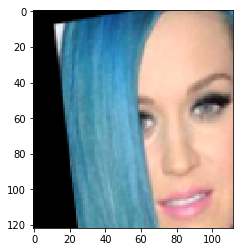

In [54]:
import matplotlib.pyplot as plt 
plt.imshow(images_aug_arr[2])
plt.show()